<a href="https://colab.research.google.com/github/emruwah/Python/blob/master/R%26D5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [43]:
df=pd.read_csv('/content/50_Startups.csv')

In [44]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [45]:
df = pd.get_dummies(df, columns=['State'], drop_first=True)

In [46]:
features = ['R&D Spend', 'Administration', 'Marketing Spend']
target = 'Profit'

X = df[features]
y = df[target]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

In [50]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [26]:

print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')


R-squared: 0.90
Mean Absolute Error (MAE): 6979.15
Mean Squared Error (MSE): 80926321.22


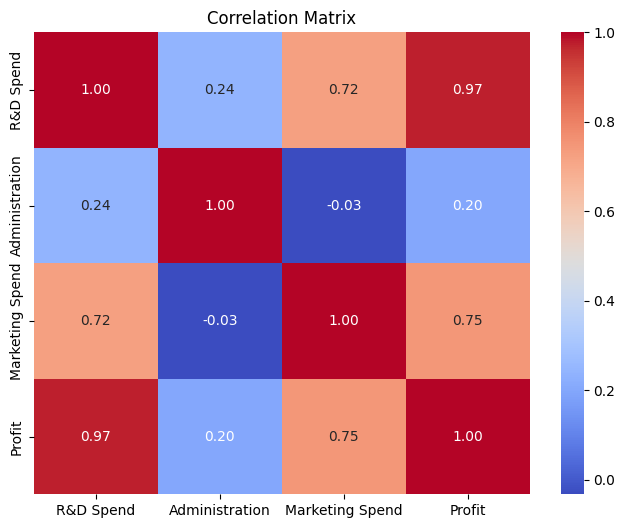

In [27]:
corr = df[features + [target]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

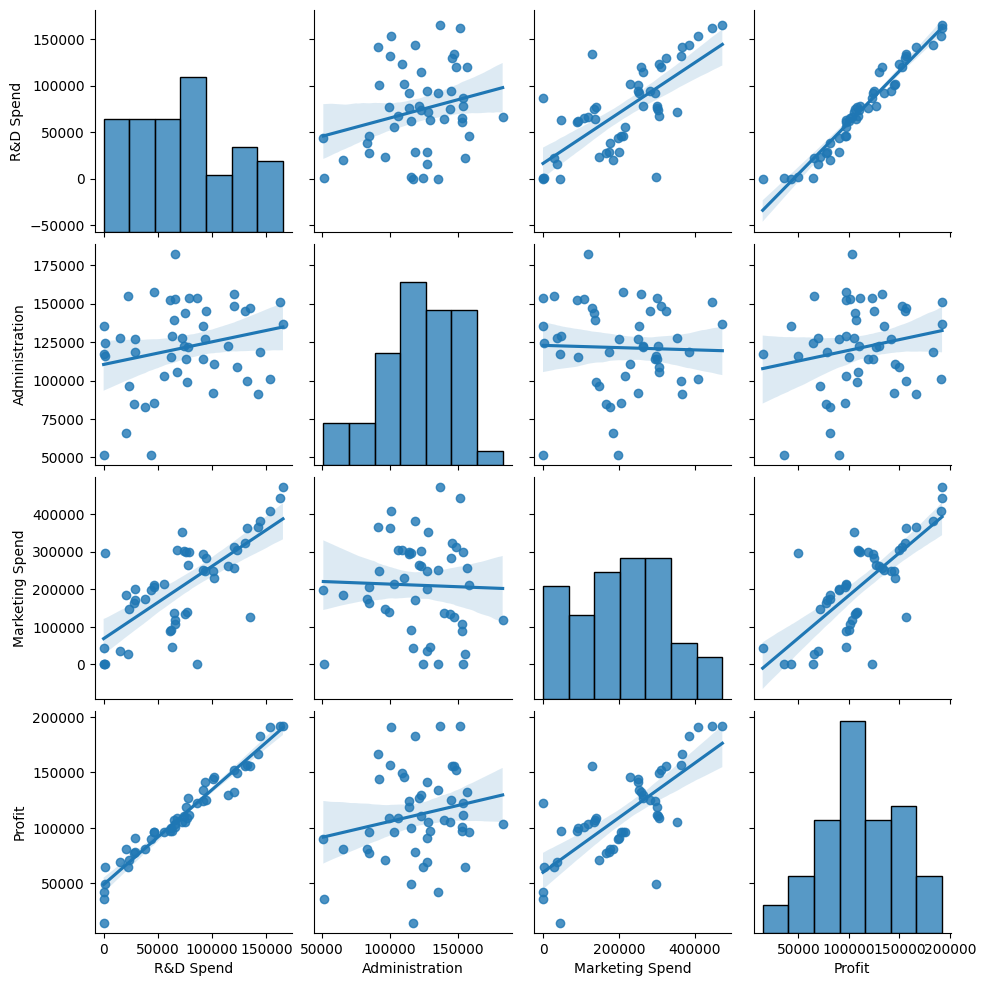

In [28]:
sns.pairplot(df, vars=features + [target], kind='reg')
plt.show()

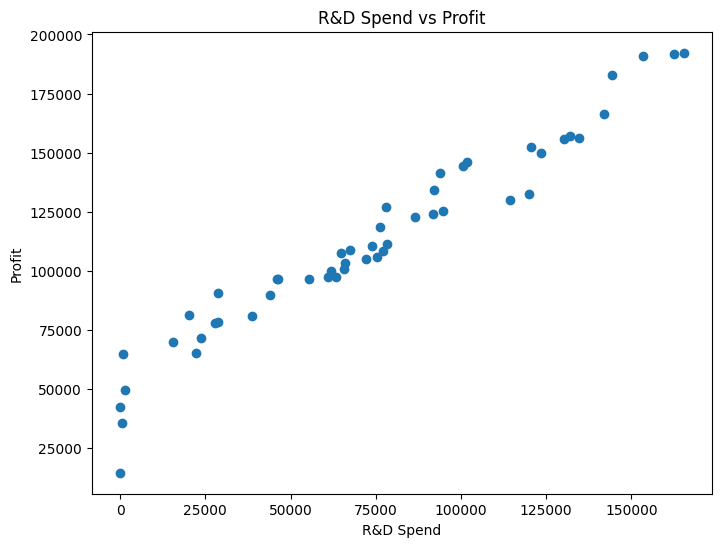

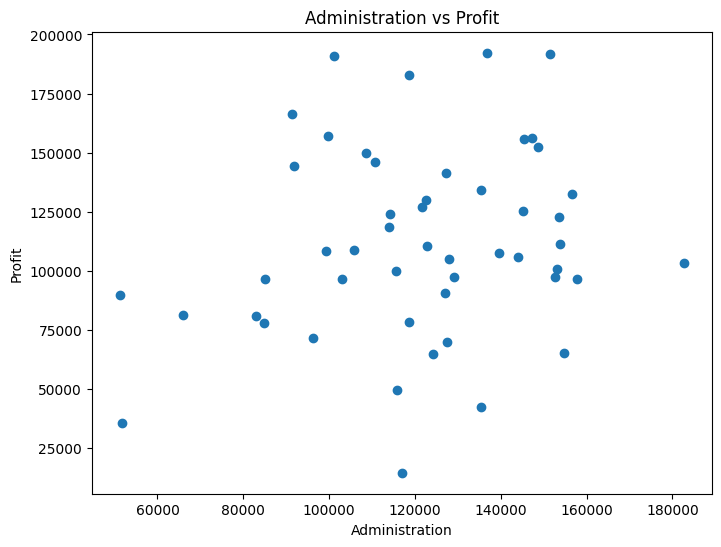

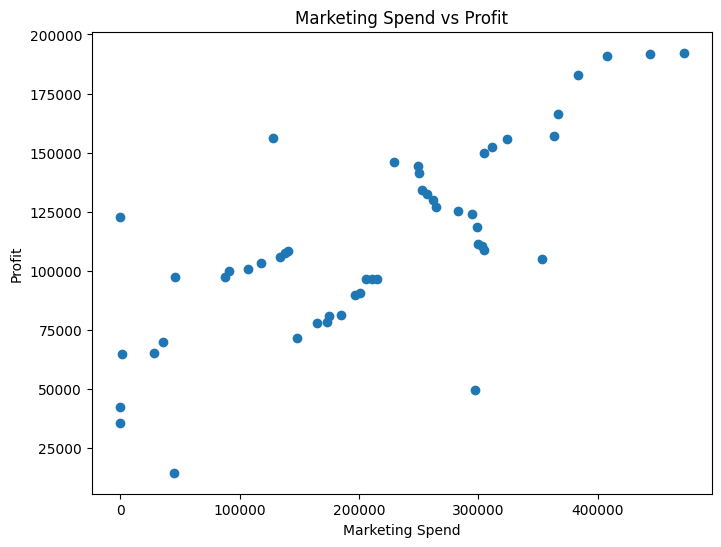

In [29]:
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df[target])
    plt.title(f'{feature} vs Profit')
    plt.xlabel(feature)
    plt.ylabel('Profit')
    plt.show()
